# Advanced Interactivity

In [9]:
import networkx as nx
import altair as alt
import nx_altair as nxa
import numpy as np

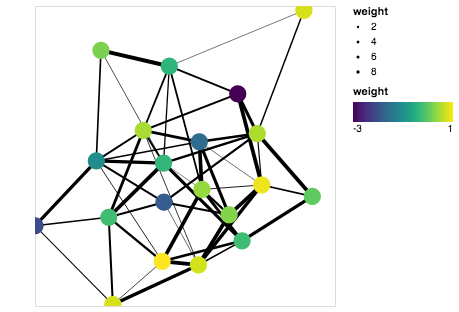

In [72]:
# Generate a random graph
G = nx.fast_gnp_random_graph(n=20, p=0.25)

# Add weights
for n in G.nodes():
    G.nodes[n]['weight'] = np.random.randn()

for e in G.edges():
    G.edges[(e[0],e[1])]['weight'] = np.random.uniform(1, 10)
    
# Compute positions for viz.
pos = nx.spring_layout(G)


# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['x'], empty='none')

# Draw edges
edges = nxa.draw_networkx_edges(
    G, 
    pos,
    width='weight'
)

# Draw nodes
nodes = nxa.draw_networkx_nodes(
    G, pos,
    node_color='weight',
    cmap='viridis'
)


# Add selector to nodes
selector = nodes.properties(
    selection=nearest,
)

# Display node text.
selector = selector.mark_text(
    align='left', 
    dx=5, 
    dy=-10
).encode(
    text=alt.condition(
        nearest, 
        'x', 
        alt.value(' ')
    )
)


# Construct a layered chart
chart = alt.layer(edges, nodes, selector)

# Configure layout.
chart = chart.configure_axis(
    ticks=False,
    grid=False,
    domain=False,
    labels=False,
).properties(
    height=300,
    width=300
)

# Add interactivity.
chart.interactive()